Setup the notebook

In [1]:
!pip install -r ../requirements.txt
import visualising_poetry as vp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
vp.setup_if_needed()

Count the number of times that a publications has the first (discovered) publication
of a poem. 

<Figure size 720x360 with 0 Axes>

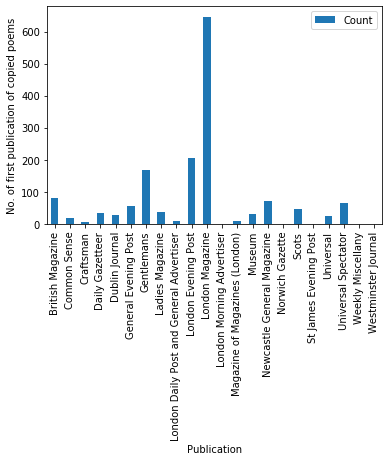

In [9]:
# get the dataset
df = vp.complete_dataset()

# get the copies as a dataset
df_copied = vp.copied_poems(df)

# axes
pubs = vp.publication_list(df_copied)
count = ['Count']

# data frame to track counts
count_df = pd.DataFrame(np.zeros(shape=(pubs.size, 1)), columns=count, index=pubs)

# get the first occurrence of the poem
df_copied_grouped_first = df_copied.sort_values([vp.REF_NO, vp.PRINTED_DATE]).groupby(vp.REF_NO)[[vp.REF_NO, vp.PUB_TITLE, str(vp.PRINTED_DATE)[:10]]].nth(0)[vp.PUB_TITLE]

for title in df_copied_grouped_first:
    count_df.at[title, count[0]] += 1

plot.figure(figsize=(10,5))
count_df.plot(kind='bar')
plot.xlabel('Publication')
plot.ylabel('No. of first publication of copied poems')
plot.show()


